In [1]:
!pip install sympy
!pip install numpy
!pip install matplotlib
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sympy as sp
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt

In [ ]:
sp_x = sp.symbols("x")
sp_f_of_x = sp.cos(sp_x)
sp_exact_derivative = sp.diff(sp_f_of_x, sp_x)

f_of_x =sp.lambdify(sp_x, sp_f_of_x, 'numpy')
exact_derivative = sp.lambdify(sp_x, sp_exact_derivative, 'numpy')

In [4]:
def forrward_diffrence_dervative(f_of_x,x,dx=1e-8):
    return (f_of_x(x+dx)- f_of_x(x))/dx

In [5]:
def centeral_diffrence_dervative(f_of_x,x,dx=1e-8):
    return (f_of_x(x+dx) - f_of_x(x - dx))/2/dx

In [6]:
period = 2*np.pi
xs = np.linspace(0, 2 * period, 100)
dxs = [1e-1, 1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8, 1e-9, 1e-10]
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Processing dx values: 100%|██████████| 10/10 [00:00<00:00, 58.98it/s]


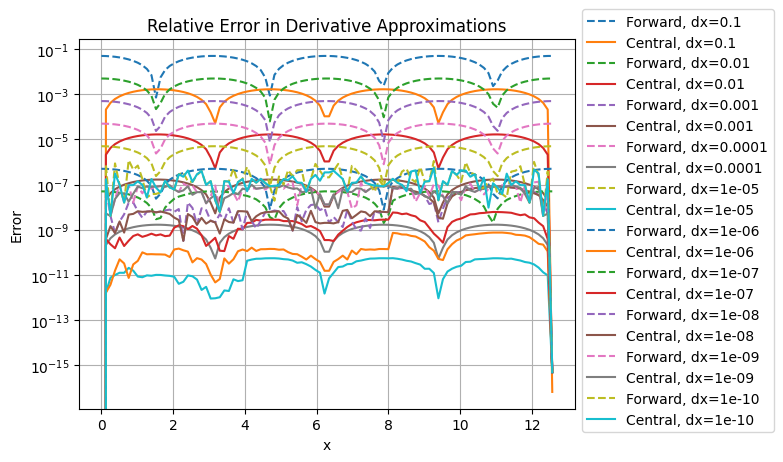

In [ ]:
for dx in tqdm(dxs, desc="Processing dx valuess"):
    forward_errors = []
    central_errors = []
    for x in tqdm(xs, desc=f"Calculating errors for dx={dx}", leave=False):
        exact = exact_derivative(x)  # Using SymPy's derivative calculation
        forward_derivative= forrward_diffrence_dervative(f_of_x,x, dx)
        centeral_derivative = centeral_diffrence_dervative(f_of_x,x, dx)
        
        forward_errors.append( abs(forward_derivative - exact))
        central_errors.append(abs(centeral_derivative - exact))

    plt.plot(xs, forward_errors, label=f'Forward, dx={dx}', linestyle='--')
    plt.plot(xs, central_errors, label=f'Central, dx={dx}', linestyle='-')
plt.xlabel('x')
plt.ylabel('Error')
plt.yscale('log')
plt.title('Relative Error in Derivative Approximations')
plt.legend(bbox_to_anchor=(1, 1.1), loc='upper left')
plt.grid(True)
plt.show()

As we see the error is minimum at the centeral diffrence with $dx=10^{-10}$, also compared to forrward diffrence, centeral diffrence is much more accurate getting a minimum error of $10^{-12}$ while the minimum error of the forward diffrence is $10^{-7}$